# <div align="center">**Teleportación Cuántica usando Qiskit**</div>

### Primero instalamos el módulo *qiskit*

In [1]:
!pip install qiskit==0.39.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.5 MB/s 
     |████████████████████████████████| 19.2 MB 6.8 MB/s 
     |████████████████████████████████| 240 kB 35.0 MB/s 
     |████████████████████████████████| 106 kB 42.6 MB/s 
     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 49 kB 2.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 929 kB 30.3 MB/s 
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 4.0 MB 42.0 MB/s 
     |████████████████████████████████| 1.9 MB 37.5 MB/s 
     |████████████████████████████████| 112 kB 63.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12224 sha256=9ffaf4f45451d06eec38c6aa2bfdd0cf102d7745ed4c6389d7b502d8d04154dc
  Stored in directory: /root/.cache/pip/wheels/6d/40/56/93df1

### También instalamos la librería *pylatexenc* para dibujar los diagramas con *MatplotlibDrawer*

In [2]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.6 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=1042e45470584eca94c208b729bcf180a8f83bccf82b9cee475cd5b66fd445e9
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc



## <div align="center">**Compuertas Cuánticas**</div>

### Recordemos que 
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

### para la compuerta X de Pauli

$$ X =\ket{0}\bra{1} + \ket{1}\bra{0}$$

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

### para la compuerta Y de Pauli
$$ Y =-i\ket{0}\bra{1} + i\ket{1}\bra{0}$$

$$ Y \ket{0}= i\ket{1}$$
$$ Y \ket{1}= -i\ket{0}$$

### para la compuerta Z de Pauli
$$ Z =\ket{0}\bra{0} - \ket{1}\bra{1}$$

$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$

### para la compuerta H de Hadamard
$$ H =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \bra{0}+ \frac{\ket{0}-\ket{1}}{\sqrt{2}} \bra{1}$$

$$ H \ket{0} =\frac{\ket{0}+\ket{1}}{\sqrt{2}}$$
$$ H \ket{1} =\frac{\ket{0}-\ket{1}}{\sqrt{2}}$$

### para la compuerta CNOT aplicada a 2 quibits, el primer bit (el que está a la derecha), se llama de control y el segundo se llama objetivo. Si el qubit de control es 1 el qubit objetivo se niega.
$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


## <div align="center">**Teleportación Cuántica**</div>

### A la fecha se ha logrado teletransportar qubits a distancias mayores a 1000 Km a través de un satélite Chino. 

###Vamos a suponer que Alice tiene un qubit arbitrario que quiere compartir a Bob. En Computación Cuántica es imposible hacer una copia de un qubit (teorema de no clonación), sin embargo se lo puede compartir a Bob a costa de destruir su qubit siguiendo el protocolo siguiente:

- Suponemos que el qubit que Alice quiere compartir es 

$$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

- Charly de da uno de esos 2 qubits entrelazados a Alice y el otro a Bob.

- Para prósitos del circuito cuántico que haremos, vamos a llamar $q_0$ a $ |\psi \rangle $, $q_1$ al qubit entrelazado de Alice y $q_2$ al qubit entrelazado de Bob

- Alice aplica una compuerta CNOT a su par de qubits $q_1q_0$

- Alice aplica una compuerta Hadamard a su qubit $q_0$

- Alice mide sus dos qubits y le pasa los resultados $C_1C_0$ a Bob por un canal clásico (con velocidad < c)

- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:

<div align="center">Si $C_1C_0 = 00$ no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ aplica una compuerta Z </div>

<div align="center">Si $C_1C_0 = 10$ aplica una compuerta X </div>

<div align="center">Si $C_1C_0 = 11$ aplica las compuertas ZX </div>

### A continuación vamos a programar este protocolo para simularlo. También lo podemos correr en alguna de las computadores cuánticas de IBM con alguna variante para corroborar que sí se llevó a cabo con éxito ya que no se puede conocer el estado inicial de $ |\psi \rangle$ ni el estado final de $q_2$ para compararlos(al medirlos se destruyen).





### El qubit arbitrario que Alice quiere teleportar a Bob es el siguiente:

In [4]:
import numpy as np
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

### Su representación en la esfera de Bloch es


$$ |\psi \rangle = cos\frac{\theta}{2}|0\rangle + e^{i\phi}sin\frac{\theta}{2}|1\rangle $$


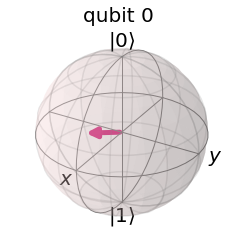

In [5]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

### Aplicando el protocolo llegamos al circuito cuántico siguiente:

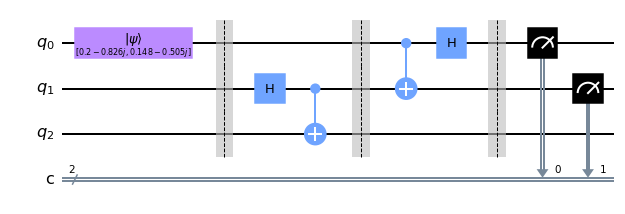

In [6]:
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.quantum_info as qi
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,2)
qc.initialize(psi, 0) 
stv0 = qi.Statevector.from_instruction(qc)
qc.barrier()
qc.h(1) # Hadamard  
qc.cx(1,2) # CNOT 
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")


### El estado de los 3 qubits al inicio es el siguiente. 

### Como ya dijimos, los 2 primeros qubits ($q_1q_0$) los tiene Alce y el tercero ($q_2$) lo tiene Bob.

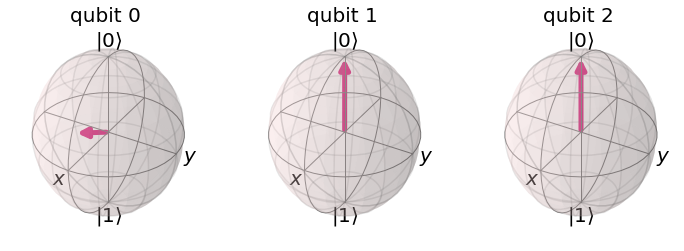

In [7]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv0)

### El estado del sistema justo antes de las mediciones de $q_0$ y de $q_1$ por Alice es:

In [8]:
stv.draw('latex', prefix='Estado \quad del \quad sistema \quad de \quad 3 \quad qubits \quad = \quad')

<IPython.core.display.Latex object>

### Ahora Alice mide sus 2 qubits obteniendo el resultado siguiente:

{'11': 1}


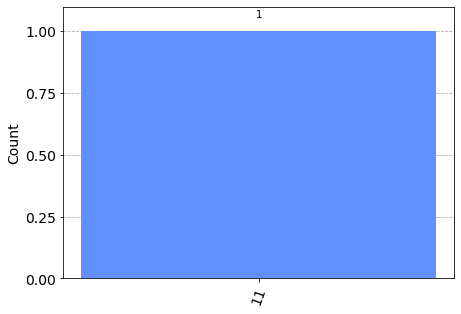

In [9]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

### Dependiendo del resultado de los 2 bits que Alice le manda, Bob aplica las compuertas cuánticas a su qubit.


In [10]:
import qiskit.quantum_info as qi
import numpy as np
qc1 = QuantumCircuit(3,2)  
print(result.get_counts(qc))
for key in result.data(qc)["counts"]:
  if int(key,0) == 0 : 
    print("El resultado es 00")
    q2_state = [np.round(stv[0],3),np.round(stv[4],3)] 
    qc1.initialize(0, 0) 
    qc1.initialize(0, 1)   
  elif int(key,0) == 1 : 
    print("El resultado es 01")
    q2_state = [np.round(stv[1],3),np.round(stv[5],3)] 
    qc1.initialize(1, 0) 
    qc1.initialize(0, 1)    
  elif int(key,0) == 2 : 
    print("El resultado es 10")
    q2_state = [np.round(stv[2],3),np.round(stv[6],3)]
    qc1.initialize(0, 0) 
    qc1.initialize(1, 1)    
  elif int(key,0) == 3 : 
    print("El resultado es 11")
    q2_state = [np.round(stv[3],3),np.round(stv[7],3)]  
    qc1.initialize(1, 0) 
    qc1.initialize(1, 1)  
q2_normalizado = q2_state/np.linalg.norm(q2_state)
qc1.barrier()
qc1.initialize(q2_normalizado, 2) 
for key in result.data(qc)["counts"]:
  if int(key,0) == 1 : 
    qc1.z(2)
  if int(key,0) == 2 : 
    qc1.x(2)
  if int(key,0) == 3 : 
    qc1.x(2)
    qc1.z(2)
  
stv1 = qi.Statevector.from_instruction(qc1)
stv1.draw('latex', prefix='Estado \quad del \quad qubit \quad 2 = ')

{'11': 1}
El resultado es 11


<IPython.core.display.Latex object>


### Vemos que en efecto el qubit de Bob se transforma en el qubit $$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$ que Alice le teleportó.

### El estado final de los 3 qubits es el siguiente:

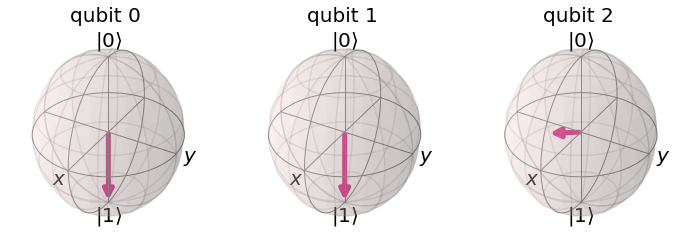

In [11]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv1)


### El circuito cuántico completo de la teleportación en este caso es el siguiente:

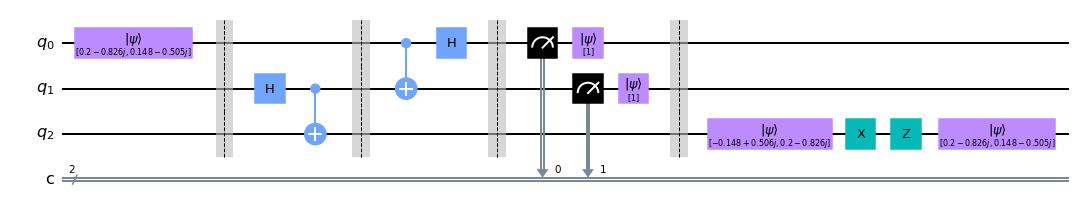

In [12]:
import qiskit.quantum_info as qi
import numpy as np
qc2 = QuantumCircuit(3,2) 
for key in result.data(qc)["counts"]:
  if int(key,0) != 0 : 
    qc2.initialize(psi, 2)
qcc = qc.compose(qc1)  
qc3 = qcc.compose(qc2)  
qc3.draw("mpl")

## <div align="center"> **Sustento Matemático del Protocolo de Teleportación**</div>


- Suponemos que el qubit que Alice quiere compartir es 

$$ \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

$$  \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

- Charly le da uno de esos 2 qubits entrelazados (el de la derecha) a Alice y el otro a Bob 


- El estado cuántico de los 3 qubits se obtiene haciendo el producto tensorial en el que Alice posee los dos primeros qubits y Bob el tercero. 

$$ \begin{align*}
\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)\otimes ( \alpha|0\rangle+ \beta |1\rangle \\
&= \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|001\rangle + \beta|111\rangle) 
\end{align*}$$

- Recordemos que 

$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


- Siguiendo el protocolo Alice aplica una compuerta CNOT a su par de qubits  $𝑞_1𝑞_0$ y enseguida una compuerta Hadamard a su qubit  $𝑞_0$. 

El resultado del estado cuántico de los 3 qubits es el siguiente:

$$ 
\begin{align*} (I \otimes I \otimes H) (I \otimes CNOT) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|001\rangle + \beta|111\rangle) \\
&= (I \otimes I \otimes H) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|011\rangle + \beta|101\rangle) \\
&= \frac{1}{2}  (\alpha(|000\rangle + |001\rangle + |110\rangle + |111\rangle) + \beta(|010\rangle - |011\rangle + |100\rangle - |101\rangle)) \\
\end{align*}
$$

que se puede reescribir como

$$
\begin{align*}
= \frac{1}{2}( (\alpha|0\rangle + \beta|1\rangle)\otimes|00\rangle  
+ (\alpha|1\rangle - \beta|0\rangle)\otimes|01\rangle   + (\alpha|1\rangle + \beta|0\rangle)\otimes|10\rangle  
 + (\alpha|1\rangle - \beta|0\rangle)\otimes|11\rangle  )
\end{align*}
$$

- Enseguida Alice mide sus 2 qubits y le manda el resultado de los 2 bits a través de un canal clásico 
 
Alice obtiene como resultado uno de los cuatro posibles resultados  $|00\rangle, |01\rangle, |10\rangle,$ o $|11\rangle$ con la misma probabilidad.  

El qubit de Bob se proyectará en uno de los 4 estados siguientes:

$$ |00\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)$$

$$|01\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$

$$|10\rangle \rightarrow (\alpha|1\rangle + \beta|0\rangle)$$

$$|11\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$

- Recordemos que

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

y


$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$


- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:

<div align="center">Si $C_1C_0 = 00$ Bob no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ Bob aplica una compuerta Z a su qubit</div> 

<div align="center">Si $C_1C_0 = 10$ Bob aplica una compuerta X a su qubit</div>

<div align="center">Si $C_1C_0 = 11$ Bob aplica las compuertas ZX a su qubit </div>

- Al final el estado del qubit de Bob será 

<div align="center"> $|q_2\rangle= \alpha|0\rangle + \beta|1\rangle$ </div>